# Linear Systems

Solving linear systems is arguably one of the most fundamental computation in numerics and statistics. Many problems can be reduced to the solution of one or many (potentially huge) linear systems.

In [1]:
# Make inline plots vector graphics instead of raster graphics
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

# Plotting
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = [9.5, 6]
plt.rcParams['font.size'] = 18 
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = [r'\usepackage{amsfonts}']

We begin by creating a random linear system with a symmetric positive definite matrix.

In [2]:
import numpy as np
from probnum.linalg import problinsolve
from probnum.linalg.linear_operators import SymmetricKronecker

# Random linear system
np.random.seed(42)
n = 25
A = np.random.rand(n, n)
A = 0.5 * (A + A.T) + 2 * np.eye(n) # Symmetrize and make diagonally dominant
b = np.random.rand(n, 1)

print("Matrix condition: {:.2f}".format(np.linalg.cond(A)))

Matrix condition: 441.12


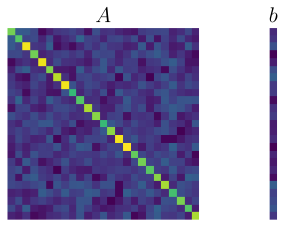

In [3]:
# Plot
matdict = {"$A$": A, "$b$": b}
vmin = np.min([np.min(mat) for mat in list(matdict.values())])
vmax = np.max([np.max(mat) for mat in list(matdict.values())])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3.5))
for i, (title, mat) in enumerate(matdict.items()): 
    axes[i].imshow(mat, vmin=vmin, vmax=vmax)
    axes[i].set_axis_off()
    axes[i].title.set_text(title)
fig.tight_layout()

## Prior Information

Prior information is encoded in a random variable. If the prior distribution has a certain covariance structure, this is exploited by the solver by using the matrix-vector product defined by the ``LinearOperator``.

In [4]:
from probnum.probability import RandomVariable, Normal

# Prior distribution on A
covA = SymmetricKronecker(np.eye(n), np.eye(n))
Ainv0 = RandomVariable(shape=A.shape, 
                       dtype=A.dtype, 
                       distribution=Normal(mean=1/np.trace(A) * np.eye(n), cov=covA))

## Probabilistic Linear Solvers

In [5]:
# Probabilistic linear solver
x, Ahat, Ainv, info = problinsolve(A=A, b=b, Ainv0=Ainv0)
print(info)

{'iter': 22, 'maxiter': 250, 'resid_l2norm': 3.842874523928107e-07, 'conv_crit': 'resid', 'matrix_cond': None}


We plot means and a few samples from the resulting distributions on $A$ and $H=A^{-1}$.

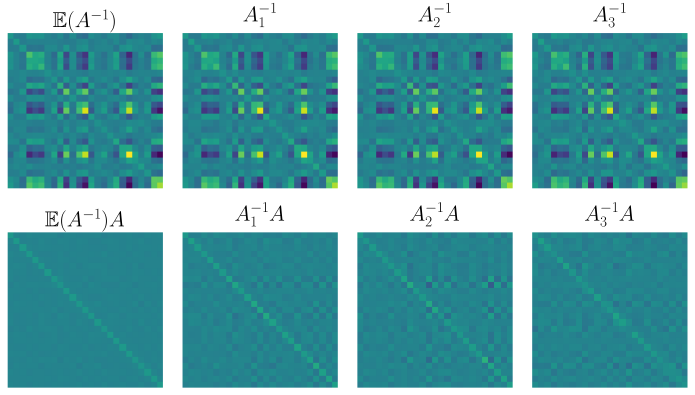

In [21]:
# Draw samples
np.random.seed(42)
Ahat_samples = Ahat.sample(3)
Ainv_samples = Ainv.sample(3)


# Plot
rvdict = {"$\mathbb{E}(A^{-1})" : Ainv.mean().todense(), 
          "$A^{-1}_1" : Ainv_samples[0], "$A^{-1}_2" : Ainv_samples[1], 
          "$A^{-1}_3" : Ainv_samples[2]}
vmin = np.min([np.min(mat) for mat in list(rvdict.values())])
vmax = np.max([np.max(mat) for mat in list(rvdict.values())])

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 6), sharey=True)
for i, (title, rv) in enumerate(rvdict.items()):
    axes[0, i].imshow(rv, vmin=vmin, vmax=vmax)
    axes[0, i].set_axis_off()
    axes[0, i].title.set_text(title + "$")
    
    axes[1, i].imshow(rv @ A, vmin=vmin, vmax=vmax)
    axes[1, i].set_axis_off()
    axes[1, i].title.set_text(title + "A$")    
plt.tight_layout()

3.3300348157595718e+19


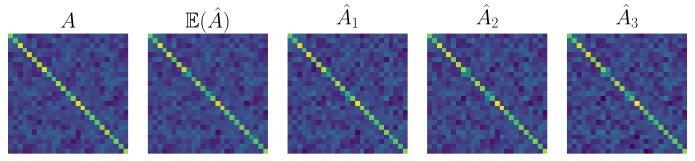

In [14]:
# Plot
rvdict = {"$A$" : A, "$\mathbb{E}(\hat{A})$" : Ahat.mean().todense(),
          "$\hat{A}_1$" : Ahat_samples[0], "$\hat{A}_2$" : Ahat_samples[1], "$\hat{A}_3$" : Ahat_samples[2],}
vmin = np.min([np.min(mat) for mat in list(rvdict.values())])
vmax = np.max([np.max(mat) for mat in list(rvdict.values())])

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 5), sharey=True)
for i, (title, rv) in enumerate(rvdict.items()):
    axes[i].imshow(rv, vmin=vmin, vmax=vmax)
    axes[i].set_axis_off()
    axes[i].title.set_text(title)
plt.tight_layout()